<a href="https://colab.research.google.com/github/MarcosVel/Deep-Learning/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
print(tf.__version__)

2.12.0


# Load in the data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
print("X_train.shape: ", X_train.shape)

4422102/4422102 [==============================] - 1s 0us/step
X_train.shape:  (60000, 28, 28)


In [3]:
# the data is only 2D
# convolution expects height x width x color
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
# another way
# X_train = np.expand_dims(X_train, -1)
# X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

(60000, 28, 28, 1)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


# Build and compile the model

In [5]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu') (x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model

In [7]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, shuffle=True)

Epoch 1/15
1875/1875 [==============================] - 21s 5ms/step - loss: 0.5136 - accuracy: 0.8116 - val_loss: 0.3807 - val_accuracy: 0.8580
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3538 - accuracy: 0.8677 - val_loss: 0.3437 - val_accuracy: 0.8744
Epoch 3/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3072 - accuracy: 0.8855 - val_loss: 0.3154 - val_accuracy: 0.8846
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2766 - accuracy: 0.8944 - val_loss: 0.3101 - val_accuracy: 0.8888
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2510 - accuracy: 0.9050 - val_loss: 0.3248 - val_accuracy: 0.8800
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2303 - accuracy: 0.9126 - val_loss: 0.2970 - val_accuracy: 0.8966
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2145 - accuracy: 0.9181 - val_loss: 0.3069 - val_accurac

# Plots

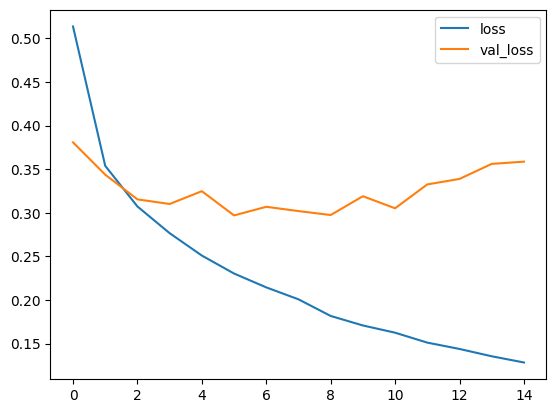

In [8]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

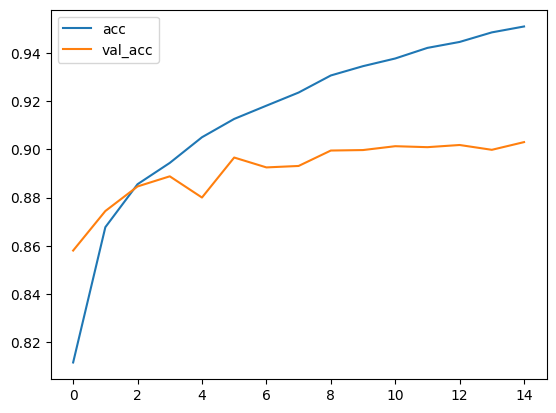

In [9]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [10]:
# evaluate the model
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.3586 - accuracy: 0.9030
[0.35861140489578247, 0.902999997138977]


# Label

In [42]:
class_indices = np.unique(y_train).tolist()
class_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [33]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [43]:
class_names = [f'{labels[i]} ({class_indices[i]})' for i in range(len(class_indices))]

print(class_names)

['T-shirt/top (0)', 'Trouser (1)', 'Pullover (2)', 'Dress (3)', 'Coat (4)', 'Sandal (5)', 'Shirt (6)', 'Sneaker (7)', 'Bag (8)', 'Ankle boot (9)']


# Confusion matrix



In [13]:
y_pred = model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
print(cm)

313/313 [==============================] - 2s 5ms/step
[[883   2  28  18   2   1  60   0   6   0]
 [  3 968   4  16   2   0   5   0   2   0]
 [ 16   0 874  11  47   0  51   0   1   0]
 [ 14   4  17 900  34   0  28   0   3   0]
 [  0   2  52  19 854   0  71   0   2   0]
 [  1   0   0   0   0 975   0  19   0   5]
 [123   0  78  23  87   0 685   0   4   0]
 [  0   0   0   0   0  13   0 961   1  25]
 [  4   0   3   3   5   1   7   2 974   1]
 [  1   0   0   0   0   9   0  34   0 956]]


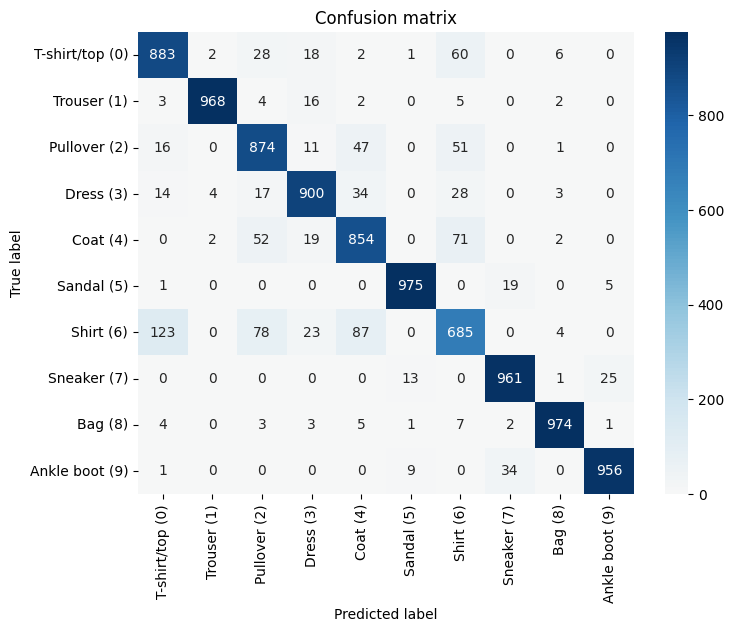

In [51]:
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu", center=0, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion matrix')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

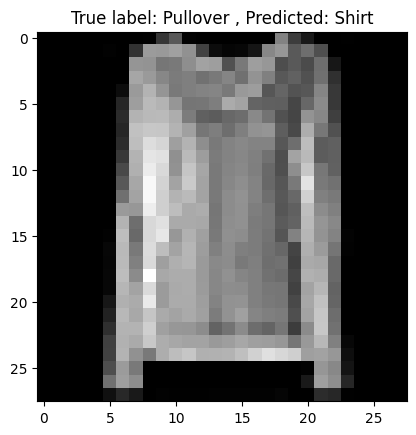

In [53]:
# show some misclassified examples

misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s , Predicted: %s" % (labels[y_test[i]], labels[y_pred[i]])); # y_test are the right values of the test